In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd .read_csv("../data/train_E1GspfA.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [4]:
# looks no missing entries
data.isna().sum()

date      0
hour      0
demand    0
dtype: int64

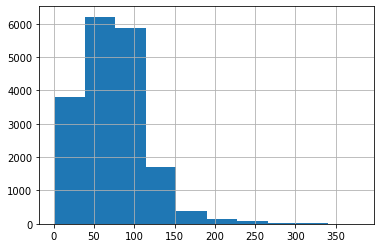

In [5]:
data.demand.hist()

In [7]:
data['hour'] = data.hour.astype('str')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  object
 2   demand  18247 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 427.8+ KB


In [13]:
data["newdatetime"] = data['date'] + ' ' + data['hour'] + ':00'

In [14]:
data.head(5)

,date,hour,demand,newdatetime
0,2018-08-18,9,91,2018-08-18 9:00
1,2018-08-18,10,21,2018-08-18 10:00
2,2018-08-18,13,23,2018-08-18 13:00
3,2018-08-18,14,104,2018-08-18 14:00
4,2018-08-18,15,81,2018-08-18 15:00


In [16]:
data["newdatetime"] = pd.to_datetime(data["newdatetime"])

In [18]:
data.set_index("newdatetime")

,date,hour,demand
newdatetime,,,
2018-08-18 09:00:00,2018-08-18,9,91
2018-08-18 10:00:00,2018-08-18,10,21
2018-08-18 13:00:00,2018-08-18,13,23
2018-08-18 14:00:00,2018-08-18,14,104
2018-08-18 15:00:00,2018-08-18,15,81
...,...,...,...
2021-02-28 19:00:00,2021-02-28,19,95
2021-02-28 20:00:00,2021-02-28,20,88
2021-02-28 21:00:00,2021-02-28,21,39


In [19]:
df = data.copy()

In [21]:
df.drop(['date', 'hour'], axis =1, inplace=True)

In [26]:
df.set_index('newdatetime', inplace=True)

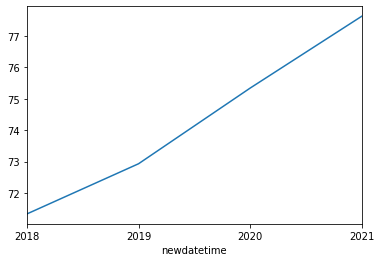

In [37]:
df['demand'].resample('Y').mean().plot()

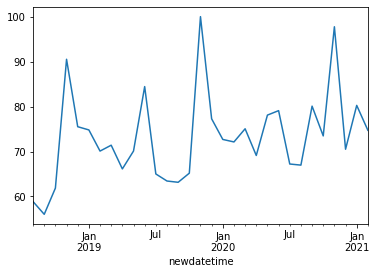

In [38]:
df['demand'].resample('M').mean().plot()

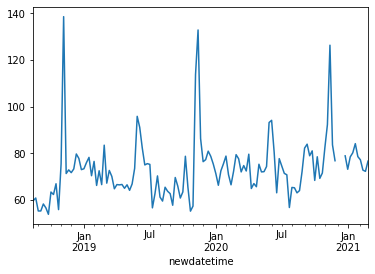

In [39]:
df['demand'].resample('W').mean().plot()

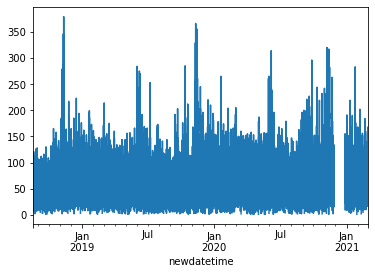

In [40]:
df['demand'].resample('h').mean().plot()

In [42]:
df.columns

Index(['demand'], dtype='object')

In [45]:
df['datetime'] = df.index.values

In [47]:
df.columns

Index(['demand', 'datetime'], dtype='object')

In [ ]:
df["month"]
df["year"]
df["date"]
df["hour"]